# Estudo de Caso 2: Previsão de Cancelamento de Reservas em Hotéis

## Introdução

O objetivo deste estudo é desenvolver um modelo preditivo para prever o cancelamento de reservas em uma rede de hotéis. O conjunto de dados utilizado está disponível no Kaggle ([Hotel Booking Demand Dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)) e contém informações sobre reservas realizadas em hotéis, incluindo detalhes como tipo de cliente, período de estadia e canais de distribuição.

Este estudo é composto pelas seguintes etapas:
- Análise exploratória da base de dados.
- Construção de um modelo preditivo utilizando Regressão Logística.
- Identificação das variáveis mais relevantes para o cancelamento das reservas.
- Avaliação do modelo com métricas como matriz de confusão, acurácia, precisão e recall.
- Realização de ajustes para melhorar o desempenho do modelo.

---

## Contexto da Base de Dados

### Descrição Geral
A base de dados de reservas de hotéis foi disponibilizada no Kaggle e contém informações detalhadas sobre reservas em dois tipos de hotéis: **city hotel** (hotéis urbanos) e **resort hotel** (hotéis de resort). O conjunto de dados inclui variáveis que abrangem características das reservas, como:

- Data da reserva.
- Duração da estadia.
- Número de adultos, crianças e bebês.
- Disponibilidade de vagas no estacionamento.
- Entre outras informações relevantes.

O objetivo principal desta análise é prever se uma reserva será cancelada ou não, com base nos dados fornecidos.

### Motivação e Aplicações
A base de dados foi projetada para responder a perguntas relacionadas à gestão de hotéis, tais como:
- Qual é a melhor época para reservar um quarto de hotel?
- Qual a duração de estadia ideal para obter melhores tarifas?
- Quais fatores influenciam o número desproporcional de solicitações especiais?

Especificamente, este estudo enfoca a construção de modelos de previsão para identificar se uma reserva será cancelada, utilizando técnicas de Machine Learning.

### Por Que Utilizar Esta Base de Dados?
Este conjunto de dados é ideal para:
1. **Análise Exploratória de Dados (EDA)**:
   - Entender padrões de comportamento de clientes.
   - Descobrir insights importantes para decisões estratégicas.
2. **Modelagem Preditiva**:
   - Aplicar algoritmos de machine learning para prever o cancelamento de reservas.
   - Identificar variáveis-chave que impactam as decisões de cancelamento.

### Principais Variáveis
Algumas das variáveis presentes na base de dados incluem:
- **hotel**: Tipo de hotel (City Hotel ou Resort Hotel).
- **is_canceled**: Indicador binário para cancelamento da reserva (1 = cancelada, 0 = não cancelada).
- **lead_time**: Tempo em dias entre a data da reserva e a chegada.
- **arrival_date_year**: Ano da chegada.
- **arrival_date_month**: Mês da chegada.
- **adults, children, babies**: Número de adultos, crianças e bebês na reserva.
- **meal**: Tipo de refeição incluída.
- **previous_cancellations**: Número de reservas anteriores canceladas pelo cliente.
- **booking_changes**: Número de mudanças na reserva.
- **deposit_type**: Tipo de depósito associado à reserva.
- **customer_type**: Tipo de cliente (ex.: recorrente ou de contrato).
- **reservation_status**: Status final da reserva (ex.: cancelada, checkout, sem-show).

### Inspiração para o Estudo
Além de prever o cancelamento de reservas, esta base de dados pode ser utilizada para explorar padrões e criar visualizações que ajudem a entender o comportamento dos clientes. É uma excelente oportunidade para praticar habilidades de **análise de dados** e **machine learning**, bem como criar relatórios informativos e bem estruturados.

---

## **Bibliotecas Utilizadas**

As seguintes bibliotecas foram utilizadas para manipulação de dados, visualização e construção do modelo:

### **1. Pandas e NumPy**
- **Finalidade**:
  - Manipulação e análise de dados tabulares.
  - Realização de operações matemáticas e manipulação de arrays.
- **Uso no Projeto**:
  - Leitura e tratamento do dataset.
  - Criação de DataFrames e arrays para análise e modelagem.
  - Transformações de dados, como substituição de valores ausentes.

### **2. Matplotlib e Seaborn**
- **Finalidade**:
  - Criação de gráficos e visualizações de dados.
- **Uso no Projeto**:
  - Geração de gráficos para análise exploratória.
  - Visualização de correlações entre variáveis e a variável alvo.

### **3. Scikit-learn**
- **Finalidade**:
  - Construção e avaliação de modelos de aprendizado de máquina.
  - Ferramentas para pré-processamento de dados e métricas de avaliação.
- **Uso no Projeto**:
  - **Pré-processamento**:
    - Normalização dos dados com `MinMaxScaler`.
    - Transformação de variáveis categóricas em numéricas com `OneHotEncoder`.
  - **Divisão de Dados**:
    - Separação em conjuntos de treino e teste com `train_test_split`.
  - **Modelagem**:
    - Treinamento de um modelo de Regressão Logística.
  - **Avaliação**:
    - Geração de matriz de confusão e relatórios de classificação.

### **4. Imbalanced-learn**
- **Finalidade**:
  - Lidar com desbalanceamento de classes no conjunto de treino.
- **Uso no Projeto**:
  - Aplicação da técnica SMOTE para balancear a classe minoritária.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

## Importação dos Dados

Nesta etapa, o conjunto de dados será carregado para o ambiente de trabalho. O arquivo será lido utilizando `pandas`, e uma análise inicial será feita para entender a estrutura e qualidade dos dados.

### Passos:
1. Carregamento do dataset no formato `.csv`.
2. Exibição das primeiras linhas para inspeção inicial.
3. Verificação de informações básicas, como:
   - Número de amostras e variáveis.
   - Presença de valores ausentes ou inconsistências.

---

In [72]:
# Carregando o conjunto de dados
hotel_data = pd.read_csv('hotel_bookings.csv')

# Exibindo as primeiras linhas do dataset
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Limpeza dos Dados

A limpeza dos dados foi realizada para garantir que o conjunto esteja consistente, completo e adequado para análise e modelagem. Abaixo estão as etapas concluídas:

### Objetivos:
1. Identificar e tratar **valores ausentes**.
2. Corrigir **inconsistências nos dados**.
3. Remover **valores inválidos**, como reservas sem hóspedes.
4. Ajustar os **tipos de dados**, quando necessário.
5. Garantir que as variáveis categóricas estejam padronizadas.

### Etapas Concluídas:
1. **Tratamento de valores ausentes**:
   - Removemos a coluna `company`, pois mais de 94% dos valores estavam ausentes.
   - Substituímos valores ausentes em `agent` por "0".
   - Preenchemos valores ausentes em `country` com a moda (valor mais frequente).
   - Preenchemos valores ausentes em `children` com "0", indicando ausência de crianças.

2. **Correção de inconsistências**:
   - Na coluna `meal`, substituímos "Undefined" pela categoria mais frequente.
   - Na coluna `country`, agrupamos países com menos de 10 ocorrências na categoria "Other".
   - Nas colunas `distribution_channel` e `market_segment`, substituímos "Undefined" por "Other".

3. **Remoção de valores inválidos**:
   - Identificamos e removemos 166 registros onde o total de hóspedes (`adults`, `children`, `babies`) era igual a zero.

4. **Ajuste de tipos de dados**:
   - Convertida a coluna `reservation_status_date` para o formato `datetime`, facilitando análises temporais.

---



In [73]:
# Verificar o número de linhas e colunas do DataFrame
rows, columns = hotel_data.shape
print(f"O DataFrame possui {rows} linhas e {columns} colunas.")

O DataFrame possui 119390 linhas e 32 colunas.


In [74]:
# Verificar colunas com valores nulos e exibi-las
missing_data_info = hotel_data.isnull().sum().sort_values(ascending=False)
missing_data_df = pd.DataFrame({
    'Coluna': missing_data_info.index,
    'Valores Ausentes': missing_data_info.values,
    'Percentual (%)': (missing_data_info.values / len(hotel_data)) * 100
})

# Filtrar apenas colunas com valores ausentes
missing_data_df = missing_data_df[missing_data_df['Valores Ausentes'] > 0]
print(missing_data_df)

     Coluna  Valores Ausentes  Percentual (%)
0   company            112593       94.306893
1     agent             16340       13.686238
2   country               488        0.408744
3  children                 4        0.003350


In [75]:
# 1. Remover a coluna 'company' devido ao alto número de valores ausentes
hotel_data_cleaned = hotel_data.drop(columns=['company'])

# 2. Substituir valores ausentes na coluna 'agent' por "0"
hotel_data_cleaned['agent'] = hotel_data_cleaned['agent'].fillna(0)

# 3. Preencher valores ausentes em 'country' com a moda
most_frequent_country = hotel_data_cleaned['country'].mode()[0]
hotel_data_cleaned['country'] = hotel_data_cleaned['country'].fillna(most_frequent_country)

# 4. Preencher valores ausentes em 'children' com "0"
hotel_data_cleaned['children'] = hotel_data_cleaned['children'].fillna(0)

In [76]:
# Verificar se todas as colunas agora estão sem valores ausentes
missing_after_cleaning = hotel_data_cleaned.isnull().sum().sum()

if missing_after_cleaning == 0:
    print("Todos os valores nulos foram tratados com sucesso!")
else:
    print(f"Ainda há {missing_after_cleaning} valores nulos no dataset.")

Todos os valores nulos foram tratados com sucesso!


In [77]:
# Verificar duplicatas
duplicate_rows = hotel_data_cleaned.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicate_rows}")

# Remover duplicatas, se existirem
hotel_data_cleaned = hotel_data_cleaned.drop_duplicates()

Número de linhas duplicadas: 32020


In [78]:
# Verificar valores únicos em variáveis categóricas
categorical_columns = hotel_data_cleaned.select_dtypes(include='object').columns

for column in categorical_columns:
    print(f"Coluna '{column}':")
    print(hotel_data_cleaned[column].unique())
    print()

Coluna 'hotel':
['Resort Hotel' 'City Hotel']

Coluna 'arrival_date_month':
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Coluna 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']

Coluna 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 

In [79]:
# 1. Ajustar a coluna 'meal': substituir "Undefined" pela categoria mais frequente
most_frequent_meal = hotel_data_cleaned['meal'].mode()[0]
hotel_data_cleaned['meal'] = hotel_data_cleaned['meal'].replace('Undefined', most_frequent_meal)

In [80]:
# 2. Agrupar países raros em 'country' em uma categoria "Other"
country_counts = hotel_data_cleaned['country'].value_counts()
rare_countries = country_counts[country_counts < 10].index
hotel_data_cleaned['country'] = hotel_data_cleaned['country'].replace(rare_countries, 'Other')

In [81]:
# 3. Tratar categorias "Undefined" em 'distribution_channel' e 'market_segment'
# Substituir por "Other"
hotel_data_cleaned['distribution_channel'] = hotel_data_cleaned['distribution_channel'].replace('Undefined', 'Other')
hotel_data_cleaned['market_segment'] = hotel_data_cleaned['market_segment'].replace('Undefined', 'Other')

In [82]:
# 4. Converter 'reservation_status_date' para datetime
hotel_data_cleaned['reservation_status_date'] = pd.to_datetime(hotel_data_cleaned['reservation_status_date'])

In [83]:
# Verificar as mudanças aplicadas
adjustments_summary = {
    "Valores únicos em 'meal'": hotel_data_cleaned['meal'].unique(),
    "Valores únicos em 'country' (após agrupamento)": hotel_data_cleaned['country'].unique(),
    "Valores únicos em 'distribution_channel'": hotel_data_cleaned['distribution_channel'].unique(),
    "Valores únicos em 'market_segment'": hotel_data_cleaned['market_segment'].unique(),
    "Tipo de dado de 'reservation_status_date'": hotel_data_cleaned['reservation_status_date'].dtype,
}

adjustments_summary

{"Valores únicos em 'meal'": array(['BB', 'FB', 'HB', 'SC'], dtype=object),
 "Valores únicos em 'country' (após agrupamento)": array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
        'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
        'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
        'Other', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
        'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
        'AGO', 'ISR', 'CPV', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN',
        'HRV', 'HKG', 'IRN', 'GEO', 'GIB', 'URY', 'CYP', 'COL', 'KWT',
        'NGA', 'MDV', 'VEN', 'SVK', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL',
        'SEN', 'AZE', 'NZL', 'THA', 'DOM', 'MYS', 'JPN', 'CMR', 'BIH',
        'BGR', 'JOR', 'SGP', 'SAU', 'QAT', 'EGY', 'PER', 'MLT', 'ECU',
        'ISL', 'MAC', 'TWN', 'IRQ', 'BGD'], dtype=object),
 "Valores únicos em 'distribution_channel'": array(['Direct', 'Corporate', 'TA/TO', 'Other', 'GDS'], dty

In [84]:
# Verificar valores inválidos
invalid_guests = hotel_data_cleaned[(hotel_data_cleaned['adults'] + hotel_data_cleaned['children'] + hotel_data_cleaned['babies']) == 0]
print(f"Número de reservas sem hóspedes: {invalid_guests.shape[0]}")

# Remover reservas sem hóspedes
hotel_data_cleaned = hotel_data_cleaned[
    (hotel_data_cleaned['adults'] + hotel_data_cleaned['children'] + hotel_data_cleaned['babies']) > 0
]

Número de reservas sem hóspedes: 166


In [85]:
# Verificar valores inválidos (reservas sem hóspedes)
invalid_guests = hotel_data_cleaned[(hotel_data_cleaned['adults'] + hotel_data_cleaned['children'] + hotel_data_cleaned['babies']) == 0]
print(f"Número de reservas sem hóspedes: {invalid_guests.shape[0]}")

Número de reservas sem hóspedes: 0


In [86]:
# Remover reservas sem hóspedes
hotel_data_cleaned = hotel_data_cleaned[
    (hotel_data_cleaned['adults'] + hotel_data_cleaned['children'] + hotel_data_cleaned['babies']) > 0
]

## Análise Exploratória

A análise exploratória será realizada para identificar padrões e compreender as características do conjunto de dados. Serão apresentados:
1. **Estatísticas Descritivas**:
   - Resumo estatístico das variáveis numéricas.
   - Análise de distribuições.
2. **Análise Gráfica**:
   - Gráficos para visualização de cancelamentos por tipo de cliente, períodos do ano, etc.
   - Identificação de correlações entre variáveis.

---


In [87]:
# Estatísticas descritivas para variáveis numéricas
hotel_data_cleaned.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204
mean,0.275308,79.991399,2016.210346,26.836292,15.815651,1.004793,2.624329,1.879524,0.138939,0.010848,0.038576,0.030411,0.184109,0.268566,81.095833,0.746514,106.527792,0.084331,0.699005,2016-08-31 02:57:56.647860224
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.250000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446672,86.062819,0.686077,13.667844,8.835240,1.027460,2.039935,0.621694,0.456327,0.113720,0.192584,0.369399,1.733289,0.710720,109.973135,10.002483,54.881424,0.281697,0.832051,NaN


<Figure size 1200x800 with 0 Axes>

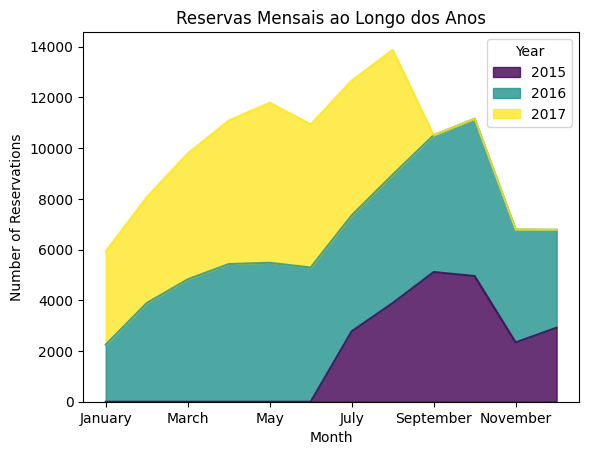

In [88]:
# Agrupar dados por ano e mês para contagem de reservas
reservations_by_year_month = hotel_data.groupby(
    ['arrival_date_year', 'arrival_date_month']
).size().unstack(level=0).reindex(
    index=['January', 'February', 'March', 'April', 'May', 'June',
           'July', 'August', 'September', 'October', 'November', 'December']
)

# Plotar o gráfico de área
plt.figure(figsize=(12, 8))
reservations_by_year_month.plot(kind='area', alpha=0.8, colormap='viridis')
plt.title('Reservas Mensais ao Longo dos Anos')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(title='Year', loc='upper right')
plt.show()

<Figure size 1400x800 with 0 Axes>

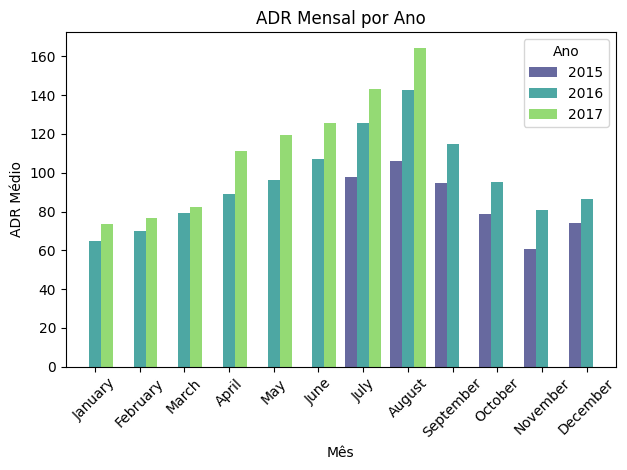

In [89]:
# Calcular a média de ADR mensalmente para cada ano
adr_2015 = hotel_data[hotel_data['arrival_date_year'] == 2015].groupby('arrival_date_month')['adr'].mean()
adr_2016 = hotel_data[hotel_data['arrival_date_year'] == 2016].groupby('arrival_date_month')['adr'].mean()
adr_2017 = hotel_data[hotel_data['arrival_date_year'] == 2017].groupby('arrival_date_month')['adr'].mean()

# Reordenar os meses para consistência
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
adr_2015 = adr_2015.reindex(months_order)
adr_2016 = adr_2016.reindex(months_order)
adr_2017 = adr_2017.reindex(months_order)

# Preparar os dados para o gráfico combinado
adr_combined = pd.DataFrame({
    '2015': adr_2015.values,
    '2016': adr_2016.values,
    '2017': adr_2017.values
}, index=months_order)

# Configurar cores da paleta "viridis"
colors = plt.cm.viridis([0.2, 0.5, 0.8])

# Plotar o gráfico combinado
plt.figure(figsize=(14, 8))
adr_combined.plot(kind='bar', color=colors, alpha=0.8, width=0.8)
plt.title('ADR Mensal por Ano')
plt.xlabel('Mês')
plt.ylabel('ADR Médio')
plt.xticks(rotation=45, ticks=np.arange(len(months_order)), labels=months_order)
plt.legend(title='Ano', labels=['2015', '2016', '2017'], loc='upper right')
plt.tight_layout()
plt.show()

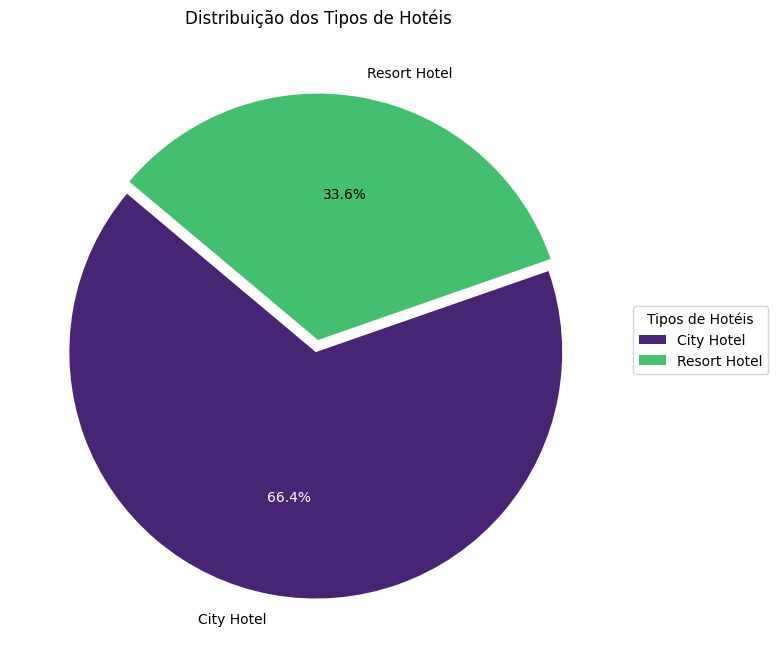

In [90]:
# Contar os tipos de hotéis no conjunto de dados
hotel_types_counts = hotel_data['hotel'].value_counts()

# Definir cores da paleta viridis e destacar uma fatia
colors = plt.cm.viridis([0.1, 0.7])
explode = [0.05, 0]  # Destacar uma das fatias

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    hotel_types_counts,
    labels=hotel_types_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode
)

# Alterar a cor do texto no gráfico de pizza
for i, autotext in enumerate(autotexts):
    if hotel_types_counts.index[i] == "City Hotel":  # Ajustar a cor apenas para "City Hotel"
        autotext.set_color("white")
    else:
        autotext.set_color("black")

# Configurar legenda fora do gráfico
plt.legend(wedges, hotel_types_counts.index, title="Tipos de Hotéis", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribuição dos Tipos de Hotéis')
plt.show()

<Figure size 1000x600 with 0 Axes>

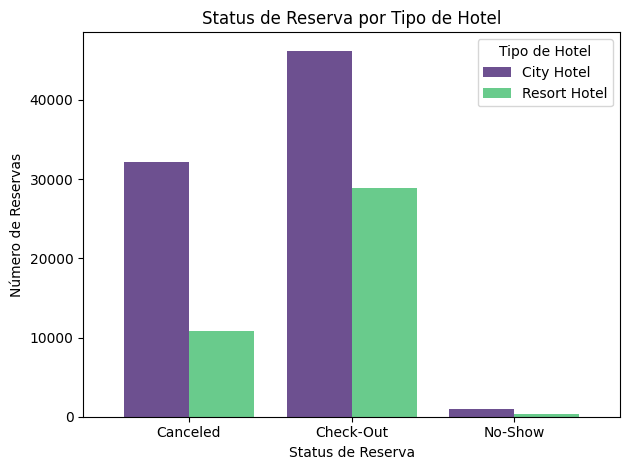

In [91]:
# Agrupar dados por status de reserva e tipo de hotel
status_by_hotel = hotel_data.groupby(['hotel', 'reservation_status']).size().unstack(level=0)

# Configurar cores da paleta "viridis"
colors = plt.cm.viridis([0.1, 0.7])

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
status_by_hotel.plot(kind='bar', color=colors, alpha=0.8, width=0.8)
plt.title('Status de Reserva por Tipo de Hotel')
plt.xlabel('Status de Reserva')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Hotel', loc='upper right')
plt.tight_layout()
plt.show()

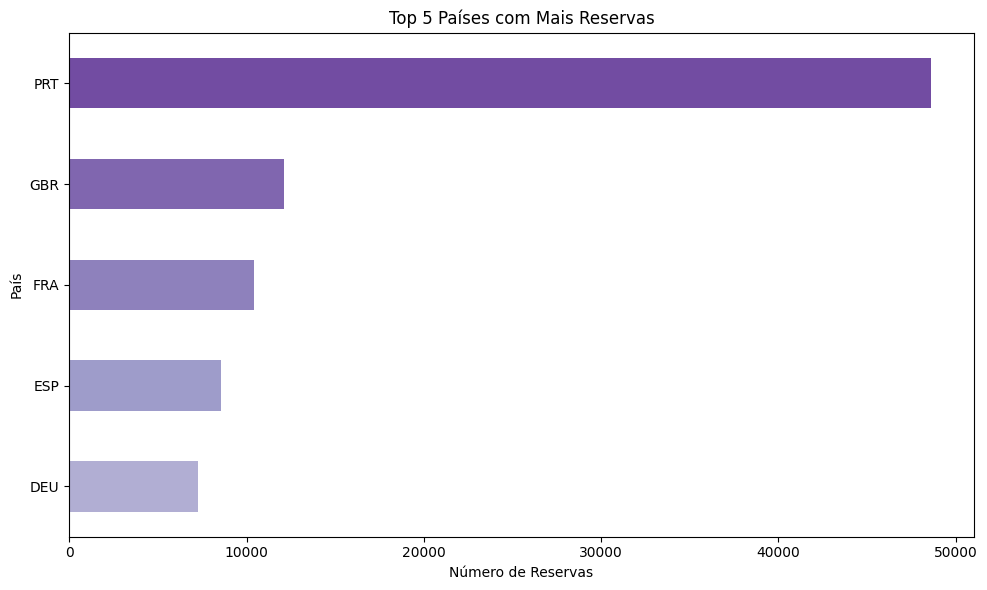

In [92]:
# Reordenar os dados para que o maior valor fique no topo
top_5_countries = hotel_data['country'].value_counts().head(5)
top_5_countries_sorted = top_5_countries.sort_values(ascending=True)

# Atualizar as cores para tons de roxo
purple_colors = plt.cm.Purples(np.linspace(0.5, 0.9, len(top_5_countries_sorted)))

# Plotar o gráfico de barras horizontal com cores roxas
plt.figure(figsize=(10, 6))
top_5_countries_sorted.plot(kind='barh', color=purple_colors, alpha=0.8)
plt.title('Top 5 Países com Mais Reservas')
plt.xlabel('Número de Reservas')
plt.ylabel('País')
plt.tight_layout()
plt.show()

## **Análise das Features Importantes**

### **1. Pré-processamento dos Dados**
- Remoção de colunas irrelevantes:
  - Excluímos `is_canceled` (variável alvo) e `reservation_status_date` (informação de data).
- Transformação de variáveis categóricas:
  - Aplicamos `OneHotEncoder` para converter variáveis categóricas em numéricas.
- Escalonamento:
  - Usamos `MinMaxScaler` para normalizar os dados no intervalo [0, 1].

### **2. Correlação com a Variável Alvo**
- Principais features com maior correlação positiva com `is_canceled`:
  - `market_segment_Online TA` (0.211): Reservas feitas por agências online.
  - `lead_time` (0.184): Maior tempo entre a reserva e o check-in.
  - `deposit_type_Non Refund` (0.165): Depósitos não reembolsáveis.
- Identificação de vazamentos:
  - Features como `reservation_status_No-Show` e `reservation_status_Check-Out` foram removidas por vazamento de informação.

### **3. Divisão dos Dados**
- Após remover os vazamentos, dividimos os dados:
  - Conjunto de treino: 61.042 amostras, 161 features.
  - Conjunto de teste: 26.162 amostras, 161 features.

---

In [93]:
# Remover colunas não relevantes para análise
X = hotel_data_cleaned.drop(columns=['is_canceled', 'reservation_status_date'])  # Remove a variável alvo e colunas de data
y = hotel_data_cleaned['is_canceled']

# Selecionar variáveis categóricas
categorical_features = X.select_dtypes(include=['object']).columns

# Transformar variáveis categóricas em numéricas
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
], remainder='passthrough')

# Transformar o conjunto de dados
X_scaled = preprocessor.fit_transform(X)

# Escalonar para garantir compatibilidade com chi2
scaler = MinMaxScaler()
X_scaled_non_negative = scaler.fit_transform(X_scaled)

# Obter os nomes das features transformadas
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combinar os nomes das features categóricas e numéricas
all_feature_names = list(categorical_feature_names) + list(X.select_dtypes(exclude=['object']).columns)

# Garantir que os nomes correspondem ao número de colunas transformadas
all_feature_names = all_feature_names[:X_scaled_non_negative.shape[1]]

# Criar o DataFrame transformado
X_transformed = pd.DataFrame(X_scaled_non_negative, columns=all_feature_names)
X_transformed['is_canceled'] = y.reset_index(drop=True)

# Calcular a correlação com a variável alvo
correlation_matrix = X_transformed.corr()

# Exibir as correlações com a variável alvo
print("\nCorrelação com a Variável Alvo:")
print(correlation_matrix['is_canceled'].sort_values(ascending=False))


Correlação com a Variável Alvo:
is_canceled                     1.000000
market_segment_Online TA        0.211514
lead_time                       0.184399
reservation_status_No-Show      0.175890
deposit_type_Non Refund         0.165053
                                  ...   
distribution_channel_Direct    -0.118501
total_of_special_requests      -0.120851
market_segment_Offline TA/TO   -0.123443
required_car_parking_spaces    -0.184519
reservation_status_Check-Out   -1.000000
Name: is_canceled, Length: 164, dtype: float64


In [94]:
# Remover variáveis de vazamento
features_to_remove = ['reservation_status_No-Show', 'reservation_status_Check-Out']
X_transformed = X_transformed.drop(columns=features_to_remove, errors='ignore')

# Atualizar o conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed.drop(columns=['is_canceled']),
    X_transformed['is_canceled'],
    test_size=0.3,
    random_state=42
)

# Verificar dimensões
print(f"Dimensões do conjunto de treino: {X_train.shape}")
print(f"Dimensões do conjunto de teste: {X_test.shape}")

Dimensões do conjunto de treino: (61042, 161)
Dimensões do conjunto de teste: (26162, 161)


## **Resultados da Análise das Features**

### **1. Features com Maior Correlação Positiva**
- `market_segment_Online TA` (0.211):
  - Reservas feitas por agências de turismo online têm maior probabilidade de cancelamento.
- `lead_time` (0.184):
  - Quanto maior o tempo entre a reserva e o check-in, maior a chance de cancelamento.
- `deposit_type_Non Refund` (0.165):
  - Depósitos não reembolsáveis estão associados a um aumento nos cancelamentos.

### **2. Features com Maior Correlação Negativa**
- `required_car_parking_spaces` (-0.184):
  - Clientes que precisam de estacionamento têm menor probabilidade de cancelar.
- `total_of_special_requests` (-0.121):
  - Mais solicitações especiais estão associadas a uma menor taxa de cancelamento.
- `distribution_channel_Direct` (-0.118):
  - Reservas feitas diretamente têm menor probabilidade de cancelamento.

### **3. Identificação de Vazamentos**
- Features como `reservation_status_No-Show` (0.176) e `reservation_status_Check-Out` (-1.000) mostraram alta correlação com `is_canceled`, mas foram removidas por vazamento de informação, pois refletem o estado final da reserva.

### **Conclusão**
As features mais relevantes para prever cancelamentos incluem:
- **Segmentos de mercado** (reservas online).
- **Características da reserva**, como antecedência (`lead_time`) e tipo de depósito.
- **Preferências dos clientes**, como estacionamento e solicitações especiais.
Essas insights ajudam a entender o comportamento associado ao cancelamento de reservas e guiar estratégias de previsão e gerenciamento.

---

## **Construção do Modelo de Regressão Logística**

O objetivo deste modelo é prever se uma reserva será cancelada com base nas features disponíveis. A Regressão Logística foi escolhida como o primeiro modelo pela sua simplicidade e eficiência em problemas de classificação binária.

### **Etapas**

1. **Separação do Dataset**:
   - Dividimos os dados em:
     - Variáveis independentes (features): `X`.
     - Variável dependente (target): `y` (`is_canceled`).

2. **Divisão do Conjunto de Dados**:
   - Utilizamos a função `train_test_split` para dividir o conjunto de dados em:
     - Conjunto de treino: 70% dos dados.
     - Conjunto de teste: 30% dos dados.

3. **Treinamento do Modelo**:
   - Treinamos o modelo de Regressão Logística no conjunto de treino (`X_train`, `y_train`).
   - Ajustamos o hiperparâmetro `max_iter=1000` para garantir a convergência.

4. **Predição e Avaliação**:
   - Realizamos previsões no conjunto de teste (`X_test`).
   - Avaliamos o modelo usando:
     - **Matriz de Confusão**: Para visualizar acertos e erros por classe.
     - **Relatório de Classificação**: Métricas como Precisão, Recall e F1-Score para ambas as classes (não cancelado e cancelado).

---

In [95]:
# Treinar um modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

## Avaliação do Modelo

Serão utilizadas as seguintes métricas para avaliar o desempenho do modelo:
- **Matriz de Confusão**: Para analisar os acertos e erros de classificação.
- **Acurácia**: Percentual de previsões corretas.
- **Precisão**: Proporção de verdadeiros positivos entre todas as previsões positivas.
- **Recall**: Proporção de verdadeiros positivos entre todos os casos positivos reais.

---

In [96]:
# Avaliar o modelo
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
[[17385  1586]
 [ 3911  3280]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86     18971
           1       0.67      0.46      0.54      7191

    accuracy                           0.79     26162
   macro avg       0.75      0.69      0.70     26162
weighted avg       0.78      0.79      0.78     26162



## **Avaliação do Modelo de Regressão Logística**

### **1. Resultados do Modelo**

#### **Matriz de Confusão**
- **Classe 0 (Não Cancelado)**:
  - Verdadeiros Negativos: 17.385
  - Falsos Positivos: 1.586
- **Classe 1 (Cancelado)**:
  - Verdadeiros Positivos: 3.280
  - Falsos Negativos: 3.911

#### **Métricas por Classe**
- **Classe 0 (Não Cancelado)**:
  - **Precisão**: 82% - Alta proporção de previsões corretas para reservas não canceladas.
  - **Recall**: 92% - Quase todos os não cancelamentos foram corretamente identificados.
  - **F1-Score**: 86% - Excelente equilíbrio entre precisão e recall.
- **Classe 1 (Cancelado)**:
  - **Precisão**: 67% - Proporção razoável de previsões corretas para cancelamentos.
  - **Recall**: 46% - Baixa taxa de captura de cancelamentos reais.
  - **F1-Score**: 54% - Desempenho moderado para a classe minoritária.

#### **Métricas Globais**
- **Acurácia Geral**: 79% - O modelo é razoavelmente eficaz na classificação geral.
- **Média Ponderada**:
  - **F1-Score**: 78% - Balanceia o desempenho entre as classes.
  - **Macro Avg F1-Score**: 70% - Reflete o desequilíbrio nas classes.

---

### **2. Interpretação dos Resultados**
- **Desempenho na Classe 0 (Não Cancelado)**:
  - O modelo apresenta ótimo desempenho na classe majoritária, com alta precisão e recall.
- **Desempenho na Classe 1 (Cancelado)**:
  - O modelo tem dificuldades em identificar corretamente as reservas canceladas, com recall de apenas 46%.
  - Isso é esperado devido ao desbalanceamento das classes no dataset.

---

### **3. Limitações**
- **Desbalanceamento de Classes**:
  - A classe cancelada (1) possui menos exemplos no conjunto de dados, o que reduz o desempenho do modelo para essa classe.
- **Recall da Classe 1**:
  - Um recall de 46% significa que muitos cancelamentos reais não estão sendo corretamente identificados.

---

### **Conclusão**
O modelo de Regressão Logística apresenta bom desempenho geral, mas melhorias são necessárias para aumentar a capacidade de prever cancelamentos corretamente. Isso é especialmente importante em cenários onde a identificação precisa de cancelamentos é crítica.

---

## **Ajustes e Melhorias: Aplicação de SMOTE**

### **Objetivo**
Equilibrar as classes no conjunto de treino para melhorar o desempenho do modelo ao prever cancelamentos. A técnica **SMOTE (Synthetic Minority Oversampling Technique)** será utilizada para criar exemplos sintéticos da classe minoritária (cancelado).

### **Etapas**
1. **Balanceamento de Classes**:
   - Aplicamos SMOTE no conjunto de treino para aumentar a representatividade da classe cancelada.
   - A técnica gera exemplos sintéticos da classe minoritária.

2. **Treinamento do Modelo**:
   - Treinamos novamente o modelo de Regressão Logística com os dados balanceados.
   - Utilizamos os mesmos hiperparâmetros do modelo inicial.

3. **Avaliação**:
   - Realizamos previsões no conjunto de teste e avaliamos o modelo utilizando:
     - **Matriz de Confusão**.
     - **Relatório de Classificação**.
  
---

In [97]:
# Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Treinar novamente o modelo
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_balanced, y_train_balanced)

# Fazer previsões
y_pred_smote = model_smote.predict(X_test)

# Avaliar o modelo balanceado
print("\nMatriz de Confusão (com SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))

print("\nRelatório de Classificação (com SMOTE):")
print(classification_report(y_test, y_pred_smote))


Matriz de Confusão (com SMOTE):
[[14073  4898]
 [ 1592  5599]]

Relatório de Classificação (com SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     18971
           1       0.53      0.78      0.63      7191

    accuracy                           0.75     26162
   macro avg       0.72      0.76      0.72     26162
weighted avg       0.80      0.75      0.76     26162



## **Análise dos Resultados**

### **1. Desempenho do Modelo Inicial**
- **Acurácia Geral**: 79%
- **Problemas Identificados**:
  - Baixo recall para a classe cancelada (46%), indicando dificuldade em identificar cancelamentos corretamente.
  - Desempenho desequilibrado devido ao desbalanceamento de classes no dataset.

### **2. Desempenho Após Aplicação do SMOTE**
- **Impacto Positivo**:
  - Recall da classe cancelada aumentou significativamente, de 46% para 78%.
  - O F1-Score da classe cancelada melhorou de 54% para 63%, mostrando um desempenho mais equilibrado.
- **Impacto Negativo**:
  - A precisão para a classe cancelada caiu de 67% para 53%, indicando um aumento no número de falsos positivos.
  - A acurácia geral diminuiu para 75%, mas isso reflete um maior equilíbrio entre as classes, o que é positivo em cenários desbalanceados.

---

### **Conclusões**
1. **Impacto do Balanceamento de Classes**:
   - A aplicação de SMOTE ajudou a melhorar a identificação de reservas canceladas (classe minoritária), tornando o modelo mais útil em situações práticas.
   - Embora a acurácia geral tenha diminuído, o modelo ficou mais equilibrado, com melhor desempenho na classe cancelada.

2. **Importância das Features**:
   - Features como `market_segment_Online TA` e `lead_time` foram identificadas como importantes para prever cancelamentos.
   - Preferências dos clientes, como solicitações especiais e necessidade de estacionamento, também foram relevantes.

3. **Limitações do Modelo**:
   - Apesar das melhorias, a precisão para a classe cancelada ainda é baixa, o que pode levar a falsos alertas de cancelamento.
   - Modelos mais avançados podem ser explorados para melhorar ainda mais o desempenho.

---

### **Recomendações Finais**
1. **Engenharia de Features**:
   - Testar interações entre features importantes, como `lead_time` e `deposit_type`.
2. **Exploração de Outros Modelos**:
   - Experimentar Random Forest, Gradient Boosting (XGBoost, LightGBM) ou modelos baseados em redes neurais.
3. **Ajustes em SMOTE**:
   - Testar diferentes proporções de oversampling para equilibrar melhor precisão e recall.
4. **Acompanhamento Contínuo**:
   - Monitorar o desempenho do modelo ao longo do tempo e reavaliá-lo periodicamente para adaptar-se a mudanças nos padrões de dados.

---

### **Conclusão Final**
Este trabalho demonstrou a importância de lidar com o desbalanceamento de classes em problemas de classificação. A aplicação de SMOTE melhorou significativamente a capacidade do modelo de identificar cancelamentos, tornando-o mais eficaz em cenários reais. No entanto, há espaço para melhorias, especialmente na precisão da classe cancelada. Os próximos passos sugeridos incluem ajustes adicionais e exploração de modelos mais robustos para aumentar a confiabilidade das previsões.
